### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [3]:
import pandas as pd
import numpy as np

# Put the dataset into a dataframe
sonar_data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", header=None)

# Descriptive statistics of the DataFrame for the first 10 features
sonar_data.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [5]:
# Substitute R with 0 and M with 1 
for col in range(len(sonar_data.columns)):
    sonar_data.loc[(sonar_data[col] == 'R')  ,col] = 0
    sonar_data.loc[(sonar_data[col] == 'M') ,col] = 1
X = sonar_data.iloc[: , :59]
y = sonar_data[60].astype(str).astype(int)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 3, 7, 10, 20, 50, 120],
              'gamma': [0.001, 0.01, 0.1, 1, 3, 7, 10, 20, 50, 120]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 3, 7, 10, 20, 50, 120],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 7, 10, 20, 50, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

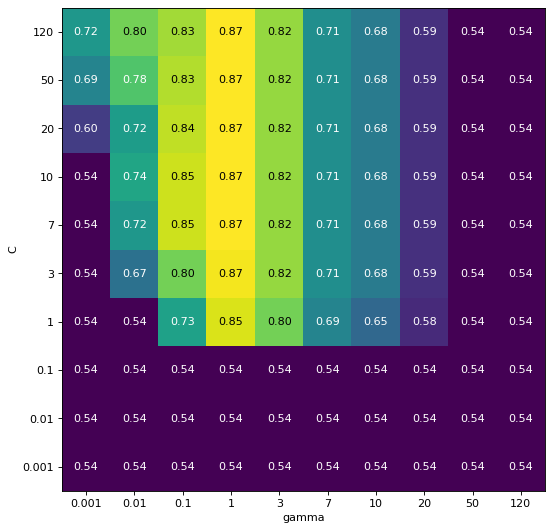

In [10]:
! pip install mglearn --user
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), dpi=80)

results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(10, 10)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [11]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.85
Best parameters: {'C': 7, 'gamma': 1}
Best cross-validation score: 0.87

Best estimator:
SVC(C=7, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


#The best score received for the parameters gamma = 1 and C= 7. Best Cross-validation score is 0.87. the score is improved/increased when the C parameter value is equal to or more than 1. The score for the test sample is 0.85, which is also good score. 

In [12]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


svc = SVC(C=2.5, gamma=.5).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

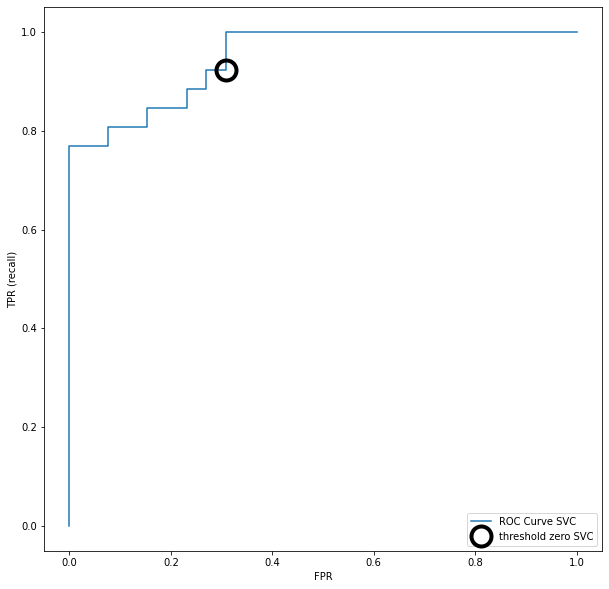

In [18]:
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['lines.markersize'] = 20
def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")

    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=4)
    
    plt.legend(loc=4)
plot_roc_curve()

In [20]:
from sklearn.metrics import roc_auc_score
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for SVC: 0.948


The ROC curve is close to the top left corner of the plot which would be the “ideal” point with a false positive rate of zero, and a true positive rate of one. The ideal point on the top left of the plot is not very realistic, but our result does return a larger area under the curve (AUC) = 0.948 which seems a good score. The zero threshold manages to have a TPR (recall) above 0.90 and FPR (precision) around 0.3.


#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.

In [23]:
! pip install xlrd --user
# Put the dataset into a dataframe
sonar_data =  pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls", sheet_name='Data', usecols='K:AE,AR,AT', header=1, skiprows =[2128,2129,2130])

# dtypes for our columns
sonar_data.dtypes

     |████████████████████████████████| 96 kB 3.2 MB/s eta 0:00:011


LB            int64
AC.1        float64
FM.1        float64
UC.1        float64
DL.1        float64
DS.1        float64
DP.1        float64
ASTV          int64
MSTV        float64
ALTV          int64
MLTV        float64
Width         int64
Min           int64
Max           int64
Nmax          int64
Nzeros        int64
Mode          int64
Mean          int64
Median        int64
Variance      int64
Tendency      int64
CLASS         int64
NSP           int64
dtype: object

In [24]:
sonar_data.shape

(2126, 23)

In [26]:
# Statistics of the DataFrame for the first 10 features
sonar_data.describe().transpose().head(10)

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.303857,9.840844,106.0,126.000000,133.000000,140.000000,160.000000
AC.1,2126.0,0.003170,0.003860,0.0,0.000000,0.001630,0.005631,0.019284
FM.1,2126.0,0.009474,0.046670,0.0,0.000000,0.000000,0.002512,0.480634
UC.1,2126.0,0.004357,0.002940,0.0,0.001876,0.004482,0.006525,0.014925
DL.1,2126.0,0.001885,0.002962,0.0,0.000000,0.000000,0.003264,0.015385
DS.1,2126.0,0.000004,0.000063,0.0,0.000000,0.000000,0.000000,0.001353
DP.1,2126.0,0.000157,0.000580,0.0,0.000000,0.000000,0.000000,0.005348
ASTV,2126.0,46.990122,17.192814,12.0,32.000000,49.000000,61.000000,87.000000
MSTV,2126.0,1.332785,0.883241,0.2,0.700000,1.200000,1.700000,7.000000
ALTV,2126.0,9.846660,18.396880,0.0,0.000000,0.000000,11.000000,91.000000


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = sonar_data.iloc[:,:-2]
y_class = sonar_data["CLASS"]
y_NSP = sonar_data["NSP"]


X_train, X_test, y_class_train, y_class_test, y_NSP_train, y_NSP_test = train_test_split(X, y_class, y_NSP, random_state=0)


In [29]:
# Utility function to report best scores
def get_best_score(results, n=5):
    for i in range(1, n + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [31]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': loguniform(1e-4, 1e0),
              'alpha': loguniform(1e-4, 1e0)}

param_grid = [
     {'classifier': [SGDClassifier(loss='hinge', penalty='elasticnet',fit_intercept=True, max_iter=10000,n_jobs=-1)], 'preprocessing': [StandardScaler(), None],
      'classifier__average': [True, False],
      'classifier__l1_ratio': loguniform(1e-4, 1e0),
      'classifier__alpha': loguniform(1e-4, 1e0)},
    
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma':loguniform(1e-4, 1e0),
     'classifier__C': loguniform(1e-4, 1e0)},
    
    {'classifier': [RandomForestClassifier(n_estimators=100,n_jobs=-1)],
     'preprocessing': [None], 
     'classifier__max_features': [1, 2, 3, 4, 5],
     'classifier__n_estimators': [10,20,40,100,200]}]

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_class_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print("Test set score of rank 1 model: {:.3f}".format(random_search.score(X_test, y_class_test)))
get_best_score(random_search.cv_results_)


RandomizedSearchCV took 44.10 seconds for 50 candidates parameter settings.
Test set score of rank 1 model: 0.874
Model with rank: 1
Mean validation score: 0.872 (std: 0.019)
Parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False), 'classifier__max_features': 5, 'classifier__n_estimators': 100, 'preprocessing': None}

Model with rank: 2
Mean validation score: 0.871 (std: 0.016)
Parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
        

For the CLASS label RandomizedSearchCV took 44.10 seconds for 50 candidates parameter settings. The model chosen from the pipeline was a RandomForestClassifier with max_features=5, n_estimators=200 classifier__max_features= 5, classifier__n_estimators = 100 and without preprocessing. The mean validation score for the best model was equal to 0.872 with a low std: 0.019. The test set score of the model was also quite good, equal to 0.874. 

In [32]:
results = pd.DataFrame(random_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean_fit_time,0.20835,0.136815,0.088801,0.106023,0.124693,0.105696,0.269324,0.185892,0.106265,0.267735,...,0.0906637,0.104453,0.104159,0.0394316,0.104339,0.0920885,0.0936574,0.147837,0.104722,0.0350614
std_fit_time,0.00115298,0.203924,0.000662167,0.000481903,0.0403552,0.000298247,0.0128052,0.00148246,0.000255701,0.00251329,...,0.00454292,0.000433258,0.000428506,0.00427074,0.000204247,0.00549079,0.0121545,0.00270002,0.000331028,0.00433779
mean_score_time,0.0228581,0.104224,0.0188545,0.00115581,0.00101161,0.00108094,0.103989,0.0193816,0.0199086,0.10385,...,0.104103,0.000946856,0.000891876,0.103647,0.000933027,0.10367,0.103814,0.0206442,0.00105019,0.103474
std_score_time,0.000717703,0.000592947,0.000578095,0.000119848,5.48854e-05,9.89871e-06,0.000327718,0.000766053,4.18196e-05,0.000489372,...,0.000195151,2.18069e-05,1.77857e-05,0.000691483,3.87703e-05,0.000219476,0.000365487,0.000612193,7.05982e-05,0.000587495
param_classifier,"SVC(C=1.0, break_ties=False, cache_size=200, c...","RandomForestClassifier(bootstrap=True, ccp_alp...","SVC(C=1.0, break_ties=False, cache_size=200, c...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","SVC(C=1.0, break_ties=False, cache_size=200, c...","SVC(C=1.0, break_ties=False, cache_size=200, c...","RandomForestClassifier(bootstrap=True, ccp_alp...",...,"RandomForestClassifier(bootstrap=True, ccp_alp...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","RandomForestClassifier(bootstrap=True, ccp_alp...","SVC(C=1.0, break_ties=False, cache_size=200, c...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp..."
param_classifier__C,0.428782,NaN,0.000313886,NaN,NaN,NaN,NaN,0.687182,0.000126144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00375426,NaN,NaN
param_classifier__gamma,0.237064,NaN,0.393974,NaN,NaN,NaN,NaN,0.587039,0.194834,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0064303,NaN,NaN
param_preprocessing,None,None,None,"StandardScaler(copy=True, with_mean=True, with...",None,"StandardScaler(copy=True, with_mean=True, with...",None,None,"StandardScaler(copy=True, with_mean=True, with...",None,...,None,None,None,None,None,None,None,None,None,None
param_classifier__max_features,NaN,5,NaN,NaN,NaN,NaN,3,NaN,NaN,4,...,5,NaN,NaN,5,NaN,4,1,NaN,NaN,1
param_classifier__n_estimators,NaN,10,NaN,NaN,NaN,NaN,200,NaN,NaN,200,...,40,NaN,NaN,10,NaN,40,40,NaN,NaN,10


In [36]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

# specify parameters and distributions to sample from
param_dist = {'average': [True, False],
              'l1_ratio': loguniform(1e-4, 1e0),
              'alpha': loguniform(1e-4, 1e0)}

param_grid = [
     {'classifier': [SGDClassifier(loss='hinge', penalty='elasticnet',fit_intercept=True, max_iter=10000,n_jobs=-1)], 'preprocessing': [StandardScaler(), None],
      'classifier__average': [True, False],
      'classifier__l1_ratio': loguniform(1e-4, 1e0),
      'classifier__alpha': loguniform(1e-4, 1e0)},
    
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma':loguniform(1e-4, 1e0),
     'classifier__C': loguniform(1e-4, 1e0)},
    
    {'classifier': [RandomForestClassifier(n_estimators=100,n_jobs=-1)],
     'preprocessing': [None], 
     'classifier__max_features': [1, 2, 3, 4, 5],
     'classifier__n_estimators': [10,20,40,100,200]}]

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(pipe, param_distributions=param_grid,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X_train, y_NSP_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print("Test set score of rank 1 model: {:.3f}".format(random_search.score(X_test, y_NSP_test)))
get_best_score(random_search.cv_results_)

RandomizedSearchCV took 34.31 seconds for 50 candidates parameter settings.
Test set score of rank 1 model: 0.945
Model with rank: 1
Mean validation score: 0.942 (std: 0.011)
Parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False), 'classifier__max_features': 4, 'classifier__n_estimators': 100, 'preprocessing': None}

Model with rank: 2
Mean validation score: 0.939 (std: 0.016)
Parameters: {'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
        

For the NSP label RandomizedSearchCV took 34.31 seconds for 50 candidates parameter settings. The best model that was picked from the pipeline was a RandomForestClassifier with max_features=5, n_estimators=50 classifier__max_features= 5, classifier__n_estimators = 100 and without preprocessing. The mean validation score for the best model was equal to 0.942 with a low std: 0.011. The test set score of the model was 0.945. We can conclude that the accuracy for the NSP label was higher compared to the class label. The randomforestClassifier model managed to have the best accuracy for both labels. We can conclude that for this data and the models that were tested the RandomForestCLassifier was suitable classifier model. 

In [37]:
results = pd.DataFrame(random_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean_fit_time,0.0552491,0.0358868,0.10546,0.162233,0.104059,0.103921,0.104077,0.104002,0.0501182,0.0874735,...,0.0861842,0.0950872,0.10515,0.0372703,0.0584206,0.105249,0.0601015,0.105286,0.0555206,0.0456831
std_fit_time,0.000544254,0.000630438,0.000354706,0.0175507,0.000295252,0.000272413,0.000358799,0.000159899,0.00033764,0.00560927,...,0.00673805,0.00118234,0.000292077,0.000137103,0.0051063,0.000410054,0.00735742,0.000181002,0.00508395,0.000598585
mean_score_time,0.00973544,0.00757427,0.00106077,0.10349,0.000924969,0.000922489,0.000881815,0.000882053,0.00967097,0.103645,...,0.103438,0.0147213,0.00108824,0.00800967,0.103612,0.00106168,0.103688,0.00107512,0.10352,0.00840898
std_score_time,0.00011382,9.41019e-05,3.46764e-05,0.000274335,3.8733e-05,7.58476e-05,2.33945e-05,1.6917e-05,9.17435e-05,0.000575154,...,0.000437422,0.00104674,4.00431e-05,4.23019e-05,0.000476611,1.65429e-05,0.000119194,3.37298e-05,0.000358509,0.000243166
param_classifier,"SVC(C=1.0, break_ties=False, cache_size=200, c...","SVC(C=1.0, break_ties=False, cache_size=200, c...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","SGDClassifier(alpha=0.0001, average=False, cla...","SVC(C=1.0, break_ties=False, cache_size=200, c...","RandomForestClassifier(bootstrap=True, ccp_alp...",...,"RandomForestClassifier(bootstrap=True, ccp_alp...","SVC(C=1.0, break_ties=False, cache_size=200, c...","SGDClassifier(alpha=0.0001, average=False, cla...","SVC(C=1.0, break_ties=False, cache_size=200, c...","RandomForestClassifier(bootstrap=True, ccp_alp...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","SGDClassifier(alpha=0.0001, average=False, cla...","RandomForestClassifier(bootstrap=True, ccp_alp...","SVC(C=1.0, break_ties=False, cache_size=200, c..."
param_classifier__C,0.00629947,0.00140566,NaN,NaN,NaN,NaN,NaN,NaN,0.00114838,NaN,...,NaN,0.0053535,NaN,0.00032712,NaN,NaN,NaN,NaN,NaN,0.00178893
param_classifier__gamma,0.00219838,0.00252078,NaN,NaN,NaN,NaN,NaN,NaN,0.0185691,NaN,...,NaN,0.632244,NaN,0.0261154,NaN,NaN,NaN,NaN,NaN,0.351587
param_preprocessing,None,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",None,None,None,None,None,None,None,...,None,None,"StandardScaler(copy=True, with_mean=True, with...",None,None,"StandardScaler(copy=True, with_mean=True, with...",None,"StandardScaler(copy=True, with_mean=True, with...",None,"StandardScaler(copy=True, with_mean=True, with..."
param_classifier__alpha,NaN,NaN,0.455525,NaN,0.250935,0.00141875,0.636519,0.000179015,NaN,NaN,...,NaN,NaN,0.197486,NaN,NaN,0.243752,NaN,0.695128,NaN,NaN
param_classifier__average,NaN,NaN,True,NaN,False,True,True,False,NaN,NaN,...,NaN,NaN,True,NaN,NaN,False,NaN,False,NaN,NaN
